In [1]:
# ENG: import all package needed to process the data 
# IND: import kebutuhan package untuk memproses data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [2]:
# ENG: Import data source to be needed
# IND: Import sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"

# ENG: read the data imported using pandas.read_csv and save it in each variable
# IND: baca data yang di import menggunakan pandas.read_csv dan simpan dalam tiap variabel
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [3]:
# ENG: running SQL in Colab or Python
# IND: menjalankan SQL di Colab atau Python
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [4]:
# ENG: running on SQL query to join data each table and save it into a dataframe
# IND: menjalankan query SQL untuk menggabungkan data tiap tabel dan simpan kedalam dataframe
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [5]:
# ENG: show first 5 data rows from dataframe
# IND: mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [6]:
# ENG: show data types each columns
# IND: menampikan tipe data tiap kolom
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [7]:
# ENG: change data types to easily do data processing
# IND: mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int32
discount_amount     int32
after_discount      int32
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int32
cogs                int64
category           object
registered_date    object
dtype: object

In [8]:
# ENG: change data types on columns order_date and registered_date to Datetime
# IND: mengubah tipe data kolom order_date dan regitered_date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int32
discount_amount             int32
after_discount              int32
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int32
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

## `No 1`
**Dear Data Analyst**,
<br>
<br>
ENG:
<br>
At the end of the year, the company will give prizes to customers who win the Year's End Festival competition. The marketing team needs help in determining the estimated prizes that will be given to the winners of the competition in the future. The prize will be taken from the TOP 5 Products of the Mobile & Tablets Category during 2022, with the highest volume of sales (valid = 1). Please send the data before the end of this month to the marketing team. We would like to thank you for your help.
<br></br>
IND:
<br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.
Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>

Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

ENG: 
<p>
    <ul>
        <li>filter dataframe based on category = Mobiles & Tablets, order year = 2022, and is_valid = 1</li>
        <li>do groupby based on sku_name and aggregate sum on column qty_ordered</li>
        <li>sort the data based on the greatest value</li>
        <li>reset the index</li>
        <li>show top 5 data</li>
    </ul>
</p>
<br>
IND: 
<P>
    <ul>
        <li>filter dataframe berdasarkan category = Mobiles & Tablets, tahun order = 2022, dan is_valid = 1</li>
        <li>lakukan groupby berdasarkan sku_name dan agregarsi penjumlahan pada kolom qty_ordered</li>
        <li>urutkan data berdasarkan nilai yang paling besar</li>
        <li>reset ulang index</li>
        <li>tampilkan 5 data teratas</li>
    </ul>
</p>

In [9]:
top5_product =  df[(df['category']=="Mobiles & Tablets") & (df['order_date'].dt.year==2022) & (df['is_valid']==1)]\
                .groupby(by='sku_name')['qty_ordered'].sum()\
                .sort_values(ascending=False)\
                .reset_index()\
                .head()
top5_product

,sku_name,qty_ordered
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10


## `No 2`
**Dear Data Analyst**,
<br><br>
ENG:
<br>
<p>
Following the joint meeting of the warehouse team and the marketing team yesterday, we found that stock availability of products with Category Others at the end of 2022 was still considerable.
<ul>
    <li>We are asking for help in checking the sales data for this category by the year 2021 by volume of sales. Our preliminary guess is that there has been a decrease in the volume of sales in 2022 compared to 2021. (Please also show data for all 15 categories).</li>
    <li>If there is a decline in the sales volume in the Others category, we would like to ask for help in providing data on the TOP 20 product names with the highest drop in 2022 compared to 2021. This is what we'll use for discussion at the next meeting.</li>
</ul>
Please help to send the data no later than four days from today. We’ll thank you for your assistance.
</p>
<!-- <br> -->
IND:
<p>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
<ul>
    <li>Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori).</li>
    <li>Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  
</li>
</ul>
Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
</p>
Regards

**Tim Warehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

<p>
ENG:
    <ul>
        <li>1. filter and make 2 dataframes based is_valid=1, and year in 2021 and 2022</li>
        <li>2. do groupby based on category dan do agregate sum on qty_ordered</li>
        <li>3. sort the data by largest value on qty_ordered and reset the index</li>
    </ul>
</p>

<p>
IND:
    <ul>
        <li>1. filter dan buat 2 dataframe berdasarkan tahun 2021, 2022 dan is_valid=1</li>
        <li>2. lakukan groupby berdasarkan category dan lakukan agregasi sum untuk qty_ordered</li>
        <li>3. urutkan data dari value qty_ordered yang terbesar dan reset indexnya</li>
    </ul>
</p>

In [10]:
sales2021 = df[(df['is_valid']==1) & (df['order_date'].dt.year==2021)]\
            .groupby(by='category')['qty_ordered'].sum()\
            .sort_values(ascending=False)\
            .reset_index()
sales2021

,category,qty_ordered
0,Soghaat,759
1,Others,426
2,Superstore,327
3,Men Fashion,237
4,Home & Living,193
5,School & Education,184
6,Health & Sports,173
7,Books,171
8,Kids & Baby,170
9,Beauty & Grooming,168


In [11]:
sales2022 = df[(df['is_valid']==1) & (df['order_date'].dt.year==2022)]\
            .groupby(by='category')['qty_ordered'].sum()\
            .sort_values(ascending=False)\
            .reset_index()
sales2022

,category,qty_ordered
0,Mobiles & Tablets,1154
1,Soghaat,612
2,Superstore,536
3,Women Fashion,489
4,Others,263
5,Home & Living,250
6,School & Education,237
7,Kids & Baby,227
8,Health & Sports,200
9,Books,195


<p>
ENG: 
    <ul>
        <li>1. merge dataframe beetwen 2021 and 2022 with left join based on each category</li>
        <li>2. make a new column name gap, to define difference value on qty_ordered on year beetwen 2021 and 2022</li>
        <li>3. sort the merged dataframe based on new column gap, by smallest value dan reset the index</li>
    </ul>
</p>

<p>
IND: 
    <ul>
        <li>1. gabung dataframe 2021 dan 2022 menggunakan left join berdasarkan masing-masing kategori</li>
        <li>2. buat kolom baru gap untuk menyatakan nilai selisih antara qty_ordered di tahun 2021 dan 2022</li>
        <li>3. urutkan dataframe gabungan berdasarkan kolom gap dari value yang terkecil dan reset indexnya</li>
    </ul>
</p>

In [12]:
salesmerge = sales2021.merge(sales2022, how='left', left_on='category', right_on='category', suffixes=('_2021', '_2022'))
salesmerge['gap'] = salesmerge['qty_ordered_2022'] - salesmerge['qty_ordered_2021']
salesmerge = salesmerge.sort_values(by='gap', ascending=True).reset_index(drop=True)
salesmerge

,category,qty_ordered_2021,qty_ordered_2022,gap
0,Others,426,263,-163
1,Soghaat,759,612,-147
2,Men Fashion,237,175,-62
3,Beauty & Grooming,168,153,-15
4,Books,171,195,24
5,Appliances,124,148,24
6,Health & Sports,173,200,27
7,Computing,109,153,44
8,School & Education,184,237,53
9,Home & Living,193,250,57


## `Jawaban No 2.2`

<p>
ENG:
    <ul>
        <li>1. filter and make 2 dataframes based on is_valid=1, category=Others and year beetwen 2021 and 2022</li>
        <li>2. do groupby based on sku_name dan do agregate sum on qty_ordered</li>
        <li>3. sort the data by largest value on qty_ordered</li>
        <li>4. take top 20 data and reset the index</li>
    </ul>
</p>

<p>
IND:
    <ul>
        <li>1. filter dan buat 2 dataframe berdasarkan is_valid=1,kategori=Others dan tahun diantara 2021 dan 2022</li>
        <li>2. lakukan groupby berdasarkan sku_name dan lakukan agregasi sum pada qty_ordered</li>
        <li>3. urutkan data dengan value yang terbesar dari qty_ordered</li>
        <li>4. ambil 20 data teratas dan reset indexnya</li>
    </ul>
</p>

In [13]:
others2021 = df[(df['category']=="Others") & (df['is_valid']==1) & (df['order_date'].dt.year==2021)]\
            .groupby(by='sku_name', as_index=False)['qty_ordered'].sum()\
            .sort_values(by='qty_ordered', ascending=False)\
            .head(20)\
            .reset_index(drop=True)
others2021

,sku_name,qty_ordered
0,RB_Dettol Germ Busting Kit-bf,200
1,Telemall_MM-DR-HB-L,23
2,Dawlance_MD 10 + DWB 600,23
3,iu_Tickets General Enclosure-Islamabad,20
4,RS_Rehmat-e-Shereen Mix Mithai,13
5,kansai_NeverWet,10
6,sindbad_Sindbad Gift Card-3,7
7,emart_00-1,7
8,Vouch 365 2016,5
9,emart_Tyre Shape Air Compressor,5


In [14]:
others2022 = df[(df['category']=="Others") & (df['is_valid']==1) & (df['order_date'].dt.year==2022)]\
            .groupby(by='sku_name', as_index=False)['qty_ordered'].sum()\
            .sort_values(by='qty_ordered', ascending=False)\
            .head(20)\
            .reset_index(drop=True)
others2022

,sku_name,qty_ordered
0,RB_Dettol Germ Busting Kit-bf,45
1,emart_Tyre Shape Air Compressor,34
2,SKMT_Medicine,20
3,shoppers stop_MagicGlass-3,13
4,TCF_Educate-a-Child-for-a-Month,8
5,emart_0-37,7
6,Entertainer Asia_Vouch 365-2017 BookLahore,7
7,kansai_Undercoating Aerosol,6
8,aw_AIR MAX MOISTURE ABSORBER & REFILLER-450gm,5
9,proactiv_acne_1,4


<p>
ENG: 
    <ul>
        <li>1. merge dataframe beetwen 2021 and 2022 with outer join based on each sku_name</li>
        <li>2. after merging the dataframes, a null value is found which must be filled with 0</li>
        <li>2. make a new column name gap, to define difference value on qty_ordered on year beetwen 2021 and 2022</li>
        <li>3. sort the merged dataframe based on new column gap, by smallest value</li>
        <li>4. take top 20 data and reset the index</li>
    </ul>
</p>

<p>
IND: 
    <ul>
        <li>1. gabung dataframe 2021 dan 2022 menggunakan outer join berdasarkan masing-masing sku_name</li>
        <li>2. setelah menggabungkan dataframe, ditemukan null value yang harus diisi denan 0</li>
        <li>2. buat kolom baru gap untuk menyatakan nilai selisih antara qty_ordered di tahun 2021 dan 2022</li>
        <li>3. urutkan dataframe gabungan berdasarkan kolom gap dari value yang terkecil</li>
        <li>4. ambil 20 data teratas dan reset indexnya</li>
    </ul>
</p>

In [15]:
others_merge = others2021.merge(others2022, how='outer', left_on='sku_name', right_on='sku_name', suffixes=('_2021', '_2022'))
others_merge.fillna(0, inplace=True)
others_merge['gap'] = others_merge['qty_ordered_2022'] - others_merge['qty_ordered_2021']
others_merge = others_merge.sort_values(by='gap', ascending=True)\
                .head(20)\
                .reset_index(drop=True)
others_merge

,sku_name,qty_ordered_2021,qty_ordered_2022,gap
0,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
1,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
2,Telemall_MM-DR-HB-L,23.0,2.0,-21.0
3,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
4,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
5,kansai_NeverWet,10.0,0.0,-10.0
6,emart_00-1,7.0,0.0,-7.0
7,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
8,Vouch 365 2016,5.0,0.0,-5.0
9,Am-PTV_ATS-004-M,5.0,0.0,-5.0


## `No 3`
**Dear Data Analyst**,
<br></br>
ENG:
<p>
Due to the company's birthday in the next two months, the Digital Marketing Team will provide promotional information to customers at the end of this month. The customer criteria we're going to need are those who have already checked out but haven't made a payment (is_gross = 1) in 2022. The data we need is the customer ID and registered date. Please send the data before the end of this month to the Digital Marketing Team.
</p>
IND:
<p>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date. Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
</p>
</br>
Regards

**Tim Digital Marketing**

## `Jawaban No 3`

<p>
ENG:
    <ul>
        <li>1. filter dataframe based on is_valid=0,, is_gross=1 and year in 2022</li>
        <li>2. show only column customer_id and registered_date</li>
        <li>3. filter only unique data to show with drop_duplicated function</li>
        <li>4. reset the index</li>
    </ul>
</p>

<p>
IND:
    <ul>
        <li>1. filter dataframe berdasarkan is_valid=0, is_gross=1 dan tahun 2022</li>
        <li>2. tampilkan hanya kolom customer_id dan registered_date</li>
        <li>3. filter hanya data unik untuk ditampilkan dengan fungsi drop_duplicates</li>
        <li>4. reset indexnya</li>
    </ul>
</p>

In [16]:
cust_promo = df[(df['is_valid']==0) & (df['is_gross']==1) & (df['order_date'].dt.year==2022)]\
                [['customer_id', 'registered_date']]\
                .drop_duplicates()\
                .reset_index(drop=True)
cust_promo

,customer_id,registered_date
0,C246762L,2022-05-08
1,C848774L,2021-11-07
2,C693415L,2022-04-12
3,C180595L,2022-04-22
4,C587425L,2022-03-22
...,...,...
815,C653797L,2022-04-03
816,C394076L,2021-10-12
817,C248585L,2022-07-10
818,C471304L,2022-05-13


## `No 4`
**Dear Data Analyst**,
</br>
ENG: 
<p>
From October to December 2022, we ran campaigns every Saturday and Sunday. We want to assess whether the campaign has had a sufficient impact on the increase in sales (before_discount). Please help to view the data:
<ul>
    <li>Average daily sales weekends (Saturday and Sunday) vs. average daily sales weekdays (Friday-Friday) per month.</li>
    <li>Average daily sales weekends (Saturday and Sunday) vs. average day sales weekdays (Friday-Friday) of the entire 3 months.</li>
</ul>
Please help us send the data by next week at the latest. We'll thank you for your help.
</p>
IND:
<p>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
<ul>
    <li>Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.</li>
    <li>Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.</li>
</ul>
Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
</p>
</br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [17]:
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df['year']=df['order_date'].dt.year
df.columns

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id', 'payment_method', 'sku_name',
       'base_price', 'cogs', 'category', 'registered_date', 'day', 'month',
       'month_num', 'year'],
      dtype='object')

In [18]:
df_3months = df[(df['is_valid']==1) & (df['year']==2022) & \
            (df['month'].isin(["October","November", 'December']))]

df_weekends = df_3months[(df_3months['day'].isin(["Saturday","Sunday"]))]\
            .groupby(by=['month'], as_index=False)['before_discount'].mean()\
            .round()\
            .sort_values(by=['month'],ascending=False)\
            .reset_index(drop=True)
df_weekends

,month,before_discount
0,October,634260.0
1,November,607794.0
2,December,410599.0


In [19]:
df_weekdays = df_3months[(df_3months['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday']))]\
            .groupby(by=['month'], as_index=False)['before_discount'].mean()\
            .round()\
            .sort_values(by=['month'],ascending=False)\
            .reset_index(drop=True)

df_weekdays

,month,before_discount
0,October,874690.0
1,November,641862.0
2,December,813574.0


In [20]:
df_merge_week = df_weekends.merge(df_weekdays,'left',left_on='month',
                                     right_on='month', suffixes=('_weekends','_weekdays'))\
                                     .reset_index(drop=True)

df_merge_week = df_merge_week.rename(columns={'before_discount_weekends': 'avg_weekends',
                                      'before_discount_weekdays': 'avg_weekdays'})
df_merge_week

,month,avg_weekends,avg_weekdays
0,October,634260.0,874690.0
1,November,607794.0,641862.0
2,December,410599.0,813574.0


<Axes: title={'center': 'Average Sales Weekend vs Weekdays'}, xlabel='Month', ylabel='Average Sales'>

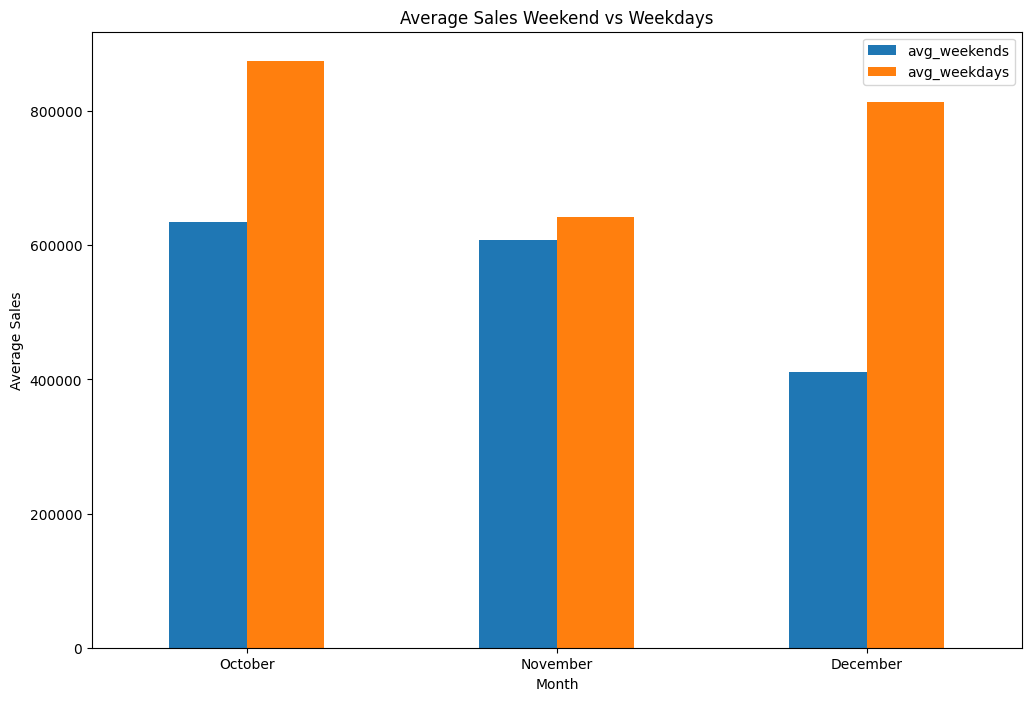

In [21]:
df_merge_week.plot(x='month',
           y=['avg_weekends','avg_weekdays'],
           kind='bar',
           grid = False,
           xlabel = 'Month',
           ylabel = 'Average Sales',
           figsize=(12,8),
           rot = 0, #Rotasi
           title = 'Average Sales Weekend vs Weekdays',
           table = False,
        #    sort_columns = False,
           secondary_y = False)

## `Jawaban No 4.2`

In [22]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
df_merge_week.sum(numeric_only=True)

avg_weekends    1652653.0
avg_weekdays    2330126.0
dtype: float64

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


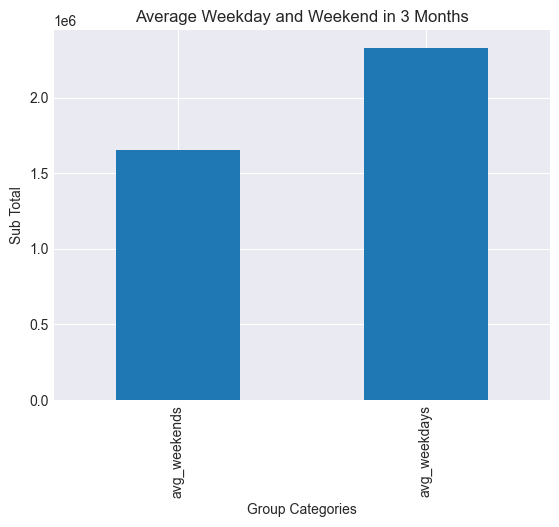

In [23]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-darkgrid')
plot4B = df_merge_week.sum(numeric_only= True).plot(kind= 'bar')
plt.xlabel('Group Categories')
plt.ylabel('Sub Total')
plt.title('Average Weekday and Weekend in 3 Months')

plt.show()